In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

In [3]:
x_train= x_train.reshape(-1, 28, 28, 1).astype('float32')/255.0
x_test= x_test.reshape(-1, 28, 28, 1).astype('float32')/255.0

In [4]:
x_train.shape

(60000, 28, 28, 1)

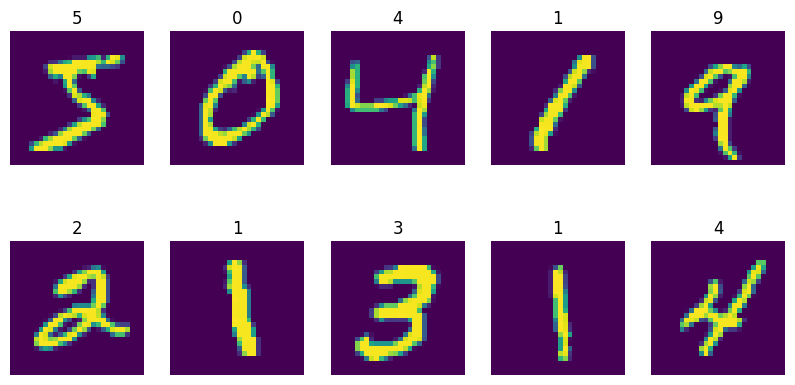

In [5]:
classes=[0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i]])
    plt.axis('off')
plt.show()

In [6]:
# Create CNN Model
x=models.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                    layers.MaxPooling2D(2,2),
layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                    layers.MaxPooling2D(2,2),

layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                    layers.MaxPooling2D(2,2),
layers.Flatten(),
layers.Dense(32,activation='relu'),
layers.Dense(15,activation='softmax')])

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model

x.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
# Train tha model
y=x.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8035 - loss: 0.6253 - val_accuracy: 0.9672 - val_loss: 0.1129
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9698 - loss: 0.1006 - val_accuracy: 0.9762 - val_loss: 0.0808
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9788 - loss: 0.0682 - val_accuracy: 0.9814 - val_loss: 0.0648
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9832 - loss: 0.0538 - val_accuracy: 0.9828 - val_loss: 0.0604
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9876 - loss: 0.0406 - val_accuracy: 0.9824 - val_loss: 0.0633
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9885 - loss: 0.0346 - val_accuracy: 0.9843 - val_loss: 0.0522
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9903 - loss: 0.0287 - val_accuracy: 0.9851 - val_loss: 0.0497
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9922 - loss: 0.02

In [9]:
losses,accuracy=x.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9829 - loss: 0.0700
0.9869999885559082
